In [1]:

DIST_PATH = 'evaluation/dtw/userAcceleration-y_distances.npy'
DATA_PATH = 'data/motionsense.csv'

In [2]:
# TODO: procurar nomes melhores
CLASS_MAP = ["dws","ups", "wlk", "jog", "std", "sit"]

In [3]:
LABEL = 'dws'

# Carregando distâncias e rótulos

In [4]:
import pandas as pd
import numpy as np
from scripts.compute_distances import get_series

In [5]:
data_df = pd.read_csv(DATA_PATH, index_col=0)

In [6]:
_, labels = get_series(data_df, 'userAcceleration.y') # da para passar qualquer coluna aqui, estamos apenas interessados nos labels

In [7]:
# convertendo ids para labels strings
labels = np.array([CLASS_MAP[i] for i in labels])

TypeError: list indices must be integers or slices, not numpy.float64

In [77]:
distances = np.load(DIST_PATH)

# Agregando distâncias com base nos rótulos

In [34]:
def agregate_distances_by_label(target_label: int, distances: np.array, labels: np.array):

    distances_by_label = {}
    same_label_ids = np.where(labels == target_label)[0]

    for label in np.unique(labels):

        different_label_ids = np.where(labels == label)[0]

        # talvez exista uma forma de fazer isso melhor
        distances_by_label[label] = []
        for same_label_id in same_label_ids:
            for different_label_id in different_label_ids:
                curr_dist = distances[same_label_id, different_label_id]
                # ignorar distancias 0 (exemplo para ele mesmo)
                if curr_dist != 0:
                    distances_by_label[label].append(distances[same_label_id, different_label_id])

    return distances_by_label

In [78]:
distance_dict = agregate_distances_by_label('dws', distances, labels)

# Preparando plot

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [82]:
def plot_distances_by_label(distance_dict: dict, label: str):

    all_distances = np.concatenate([dists for dists in distance_dict.values()])
    all_labels = np.concatenate([[label] * len(dists) for label, dists in distance_dict.items()])


    ax = sns.boxplot(y=all_distances, x=all_labels, palette='tab10', hue=all_labels, legend=False)
    plt.suptitle(f"Distâncias entre a classe '{label}' e as outras classes")
    ax.set(xlabel='Classe', ylabel='Distância')
    # TODO: salvar a figurinha

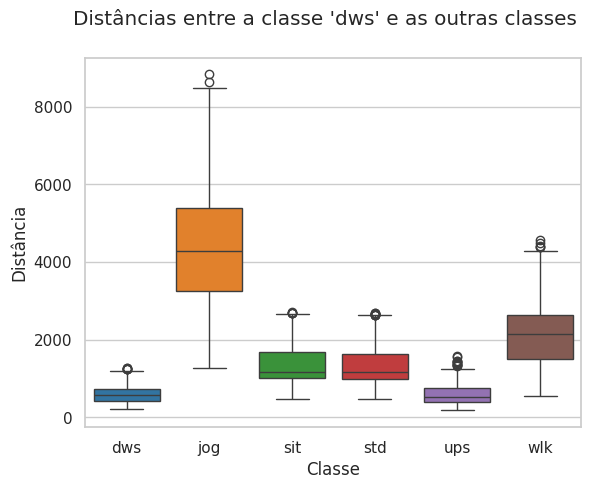

In [86]:
distance_dict = agregate_distances_by_label(LABEL, distances, labels)
plot_distances_by_label(distance_dict, LABEL)